# Cleaning The Dataset

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df=pd.read_csv("C:\\Users\\nivet\\OneDrive\\Documents\\Dataset.csv", header=0, sep=',', encoding='Latin1',)

In [2]:
print(df.offerType.value_counts())

Angebot    79236
Gesuch         1
Name: offerType, dtype: int64


In [3]:
df[df.offerType != 'Gesuch']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,24-03-2016 00:00,0.0,70435.0,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,24-03-2016 00:00,0.0,66954.0,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,14-03-2016 00:00,0.0,90480.0,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3T RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,17-03-2016 00:00,0.0,91074.0,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,31-03-2016 00:00,0.0,60437.0,06-04-2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79232,27-03-2016 11:48,Volkswagen_Golf_1.6,privat,Angebot,1400,test,limousine,2001,manuell,105,golf,150000,12,benzin,volkswagen,nein,27-03-2016 00:00,0.0,77694.0,03-04-2016 06:18
79233,08-03-2016 18:47,Mercedes_Benz_C_180_Classic,privat,Angebot,1800,test,limousine,2002,manuell,129,c_klasse,150000,10,benzin,mercedes_benz,nein,08-03-2016 00:00,0.0,22549.0,23-03-2016 11:45
79234,15-03-2016 12:37,VW_Golf_1.4_im_guten_Zustand,privat,Angebot,2100,control,limousine,2000,manuell,75,golf,125000,4,benzin,volkswagen,nein,15-03-2016 00:00,0.0,29664.0,06-04-2016 00:16
79235,12-03-2016 01:56,Peugeot_RCZ_1.6_155_THP,privat,Angebot,17500,test,coupe,2014,manuell,156,andere,40000,5,benzin,peugeot,nein,12-03-2016 00:00,0.0,96450.0,12-03-2016 22:44


In [4]:
print(df.shape)

(79237, 20)


In [5]:
df=df[(df.powerPS > 50) & (df.powerPS < 900)]

In [6]:
print(df.shape)

(68025, 20)


In [7]:
df.drop(['name', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen',
         'postalCode','dateCreated'], axis='columns',inplace=True)

In [8]:
new_df = df.copy()

In [9]:
new_df = new_df.drop_duplicates ([ 'price', 'vehicleType', 'yearOfRegistration'
                                  ,'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType'
                                  ,'notRepairedDamage'])

In [10]:
new_df.gearbox.replace(('manuell', 'automatik'), ('manual', 'automatic'), inplace=True)

In [11]:
new_df.fuelType.replace(('benzin', 'andere', 'elektro'), ('petrol', 'others', 'electric'), inplace=True)

In [12]:
new_df.vehicleType.replace(('kleinwagen', 'cabrio', 'kombi', 'andere'), 
                           ('small car', 'convertible', 'combination', 'others'), inplace=True)

In [13]:
new_df.notRepairedDamage.replace(('ja', 'nein'), ('Yes', 'No'),inplace=True)

In [14]:
new_df = new_df[(new_df.price >= 100) & (new_df.price <= 150000)]

In [15]:
new_df['notRepairedDamage'].fillna(value='not-declared', inplace=True)

In [16]:
new_df[ 'fuelType'].fillna(value='not-declared', inplace=True)

In [17]:
new_df[ 'gearbox'].fillna(value='not-declared', inplace=True)

In [18]:
new_df[ 'vehicleType'].fillna (value='not-declared', inplace=True)

In [19]:
new_df['model'].fillna(value='not-declared',inplace=True)

In [20]:
new_df.to_csv("autos_preprocessed.csv")

In [21]:
labels = ['gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']

In [25]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,6.802500e+04,68025.000000,68025.000000,68025.000000,68025.000000
mean,1.003042e+04,2004.006836,128.577111,125588.680632,5.976714
std,5.489038e+05,33.322560,61.528817,39301.517457,3.598464
min,0.000000e+00,1500.000000,51.000000,5000.000000,0.000000
25%,1.400000e+03,1999.000000,86.000000,100000.000000,3.000000
50%,3.499000e+03,2004.000000,116.000000,150000.000000,6.000000
75%,7.990000e+03,2008.000000,150.000000,150000.000000,9.000000
max,1.000000e+08,8000.000000,808.000000,150000.000000,12.000000


In [26]:
df['vehicleType'].value_counts()

limousine     18864
kleinwagen    13626
kombi         13293
bus            6020
cabrio         4475
coupe          3661
suv            2968
andere          533
Name: vehicleType, dtype: int64

In [27]:
df['vehicleType'].mode()

0    limousine
Name: vehicleType, dtype: object

# Exploratory Data Analysis

C:\Users\nivet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

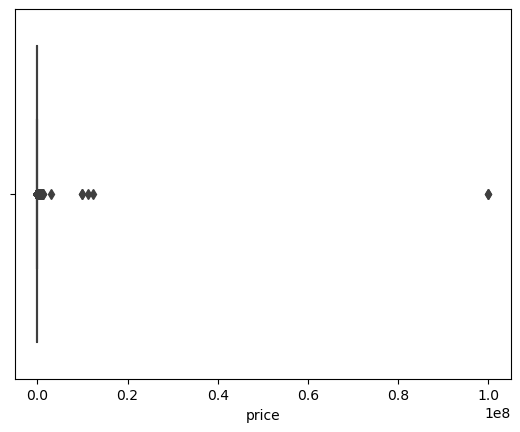

In [28]:
sns.boxplot(df['price'])

C:\Users\nivet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='offerType', ylabel='count'>

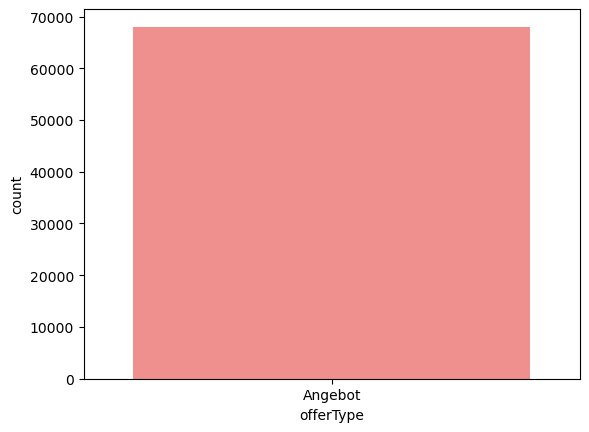

In [29]:
sns.countplot(df['offerType'],palette='spring')

C:\Users\nivet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicleType', ylabel='count'>

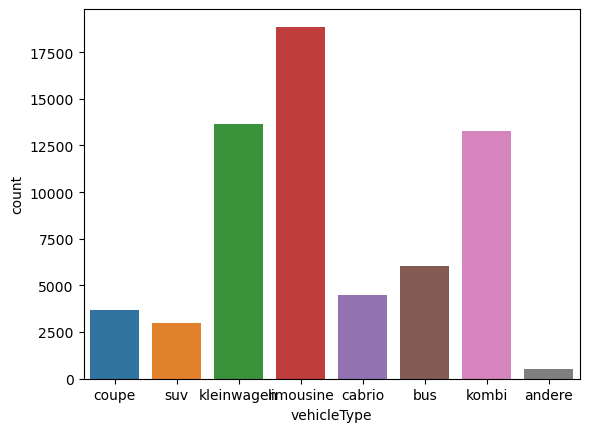

In [30]:
sns.countplot(df['vehicleType'])

C:\Users\nivet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gearbox', ylabel='count'>

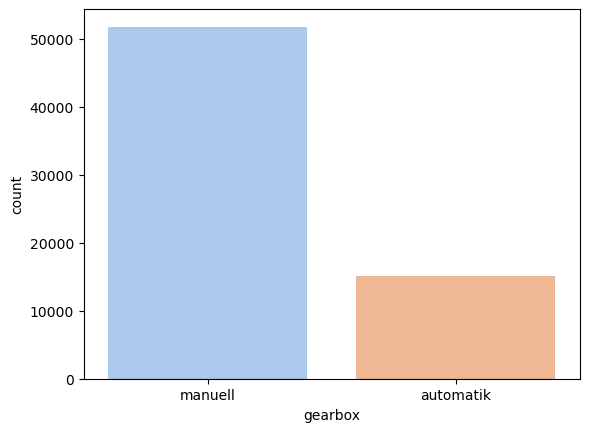

In [31]:
sns.countplot(df['gearbox'],palette='pastel')

C:\Users\nivet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model', ylabel='count'>

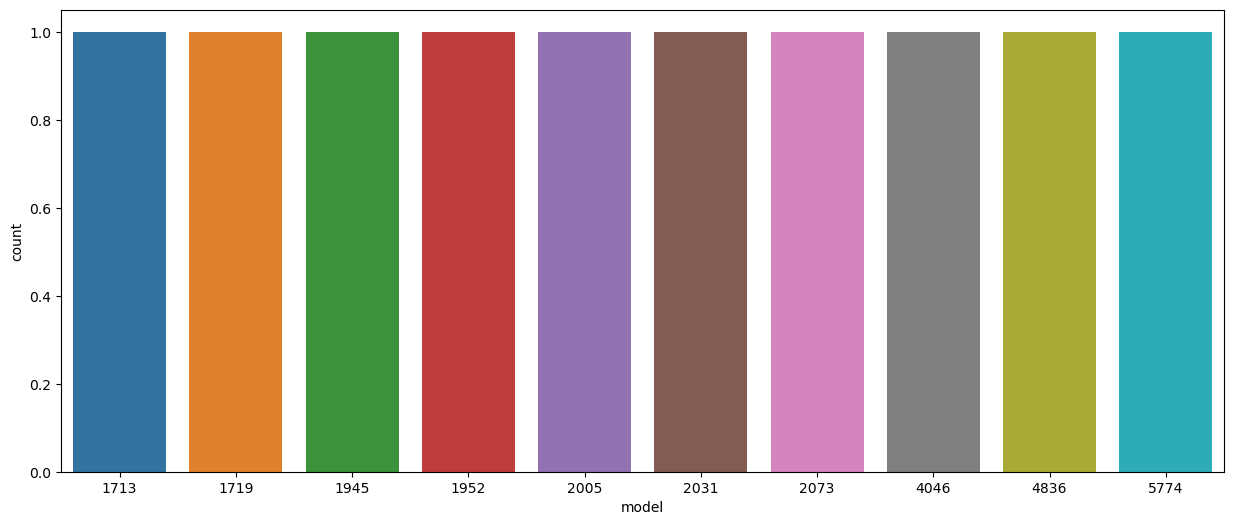

In [32]:
plt.figure(figsize =(15,6))
sns.countplot(df['model'].value_counts().head(10))

C:\Users\nivet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='brand', ylabel='count'>

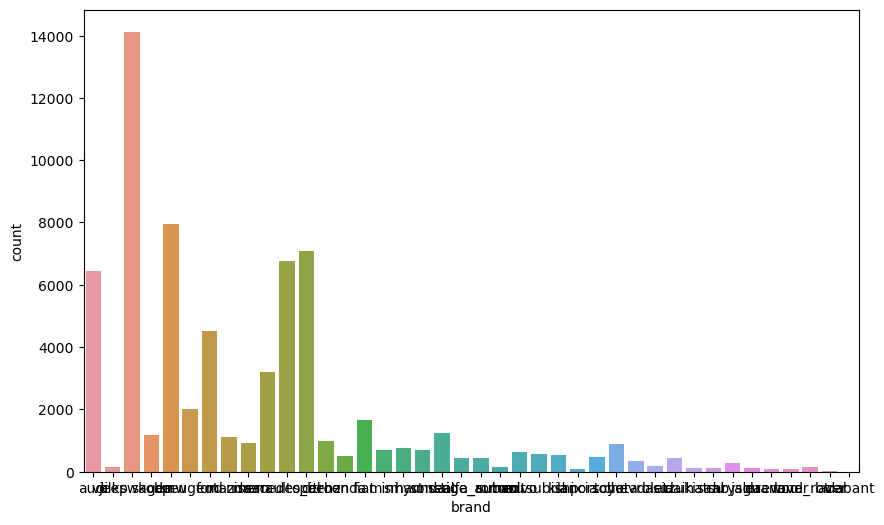

In [33]:
plt.figure(figsize =(10,6))
sns.countplot(df['brand'])

C:\Users\nivet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

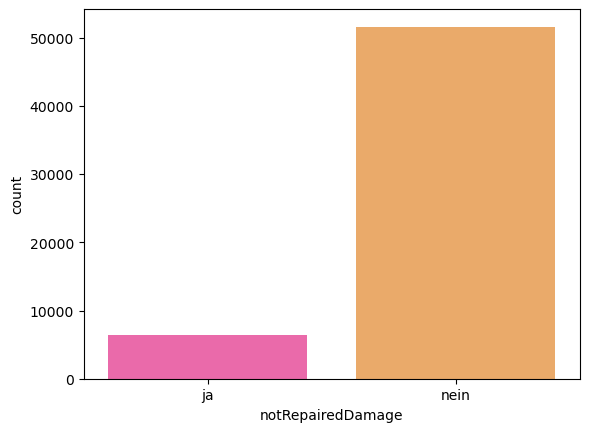

In [34]:
sns.countplot(df['notRepairedDamage'],palette='spring')

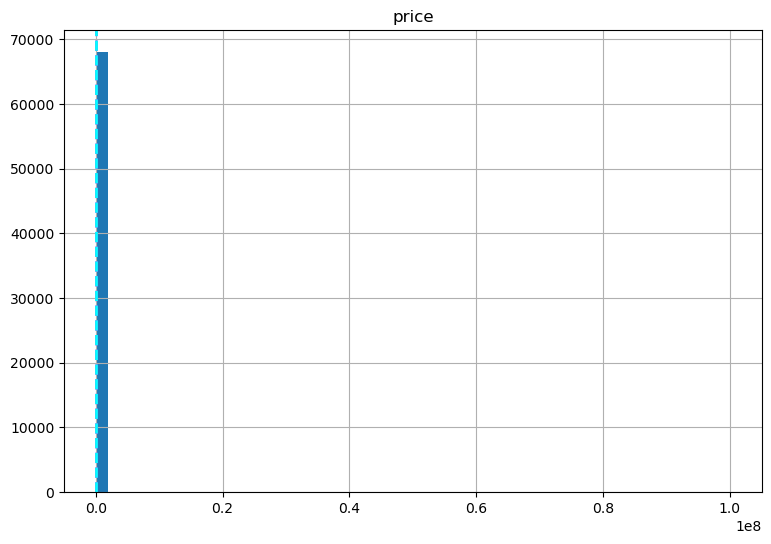

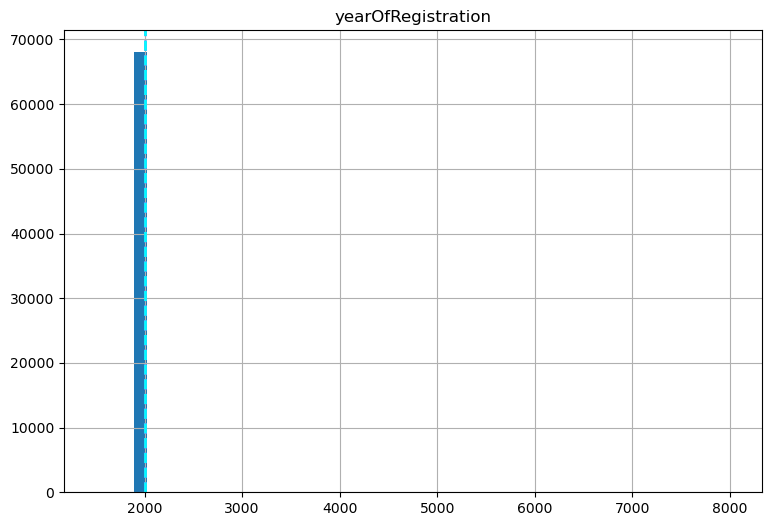

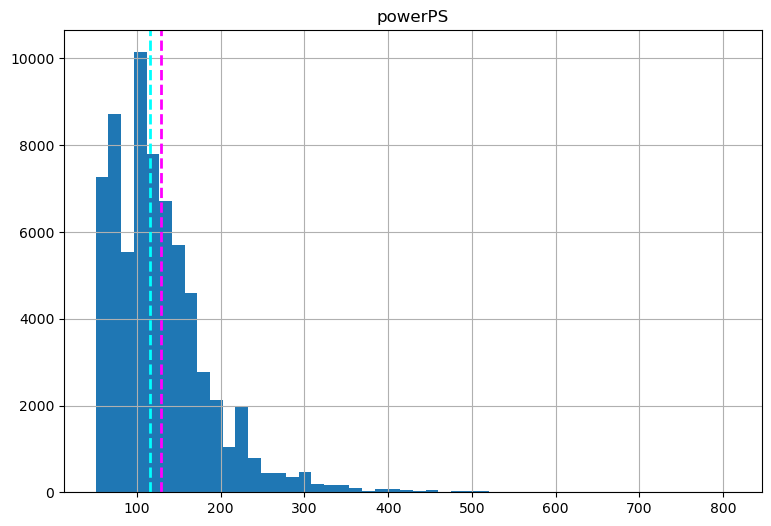

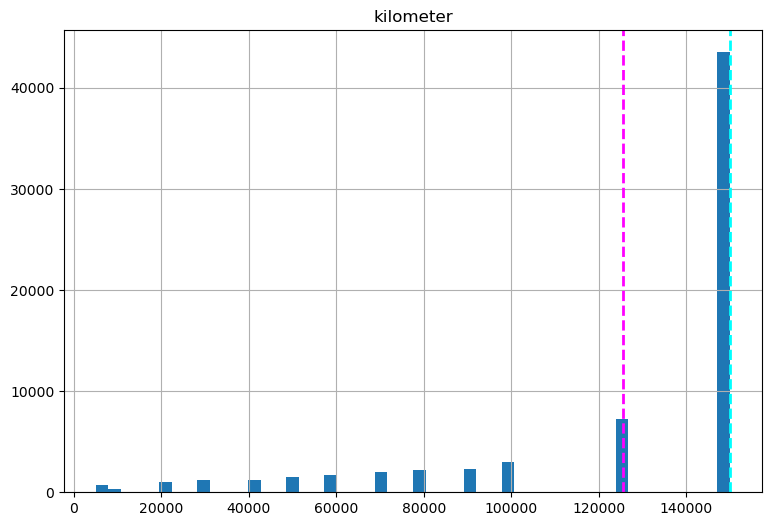

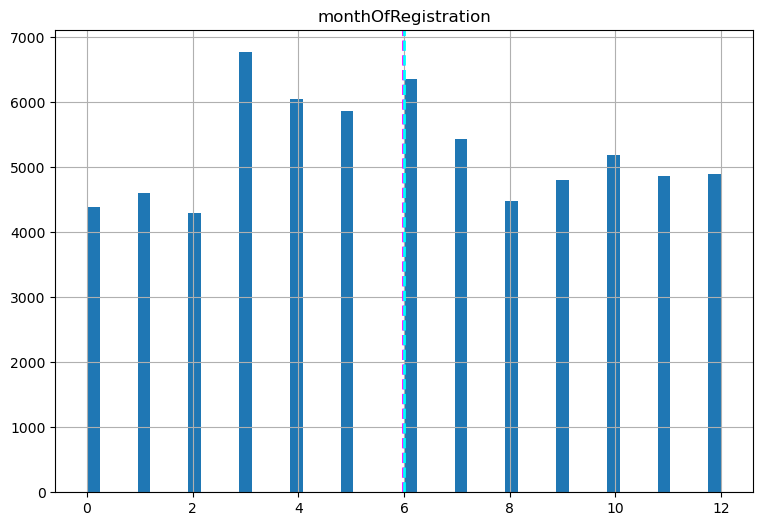

In [35]:
a=list(df.select_dtypes('number'))
for i in a:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[i]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(i)
plt.show()

In [36]:
correlation=df.corr()
correlation

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
price,1.000000,0.000297,0.014572,-0.004132,-0.001212
yearOfRegistration,0.000297,1.000000,0.026021,-0.089866,-0.005179
powerPS,0.014572,0.026021,1.000000,-0.036586,0.041714
kilometer,-0.004132,-0.089866,-0.036586,1.000000,-0.017338
monthOfRegistration,-0.001212,-0.005179,0.041714,-0.017338,1.000000


<AxesSubplot:>

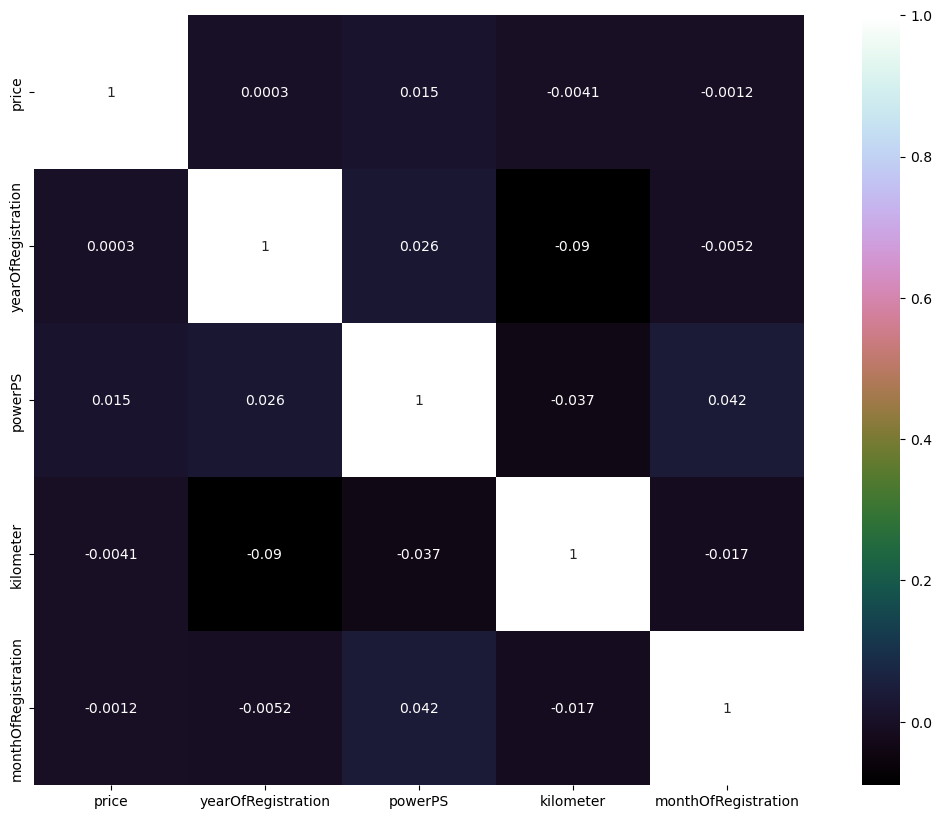

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [38]:
list(df.select_dtypes('object'))

['seller',
 'offerType',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage']